In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
from scipy.optimize import curve_fit
from scipy import special
import glob
import os
plt.style.use(['science','notebook','grid'])
import matplotlib.ticker as ticker

# Sodium

In [2]:
#Lecture des données du sodium
#Le dataframe est nommé souf par erreur en référence au souffre
souf = pd.read_csv(r"1re séance\absorbtion_reso.txt",delimiter = '\t',skiprows=17,names = ['x','y'],decimal=',')
souf['x'] = souf['x'].apply(lambda x: x.replace(',','.'))
souf.drop(3648,inplace=True)
souf['y'] = souf['y'] / 500 #temps d'intégration
souf['x'] = souf['x'].apply(lambda x: float(x))

,x,y
0,345.74,5.95672
1,345.96,5.95672
2,346.18,5.95672
3,346.39,6.02788
4,346.61,6.00484


Text(0, 0.5, 'I')

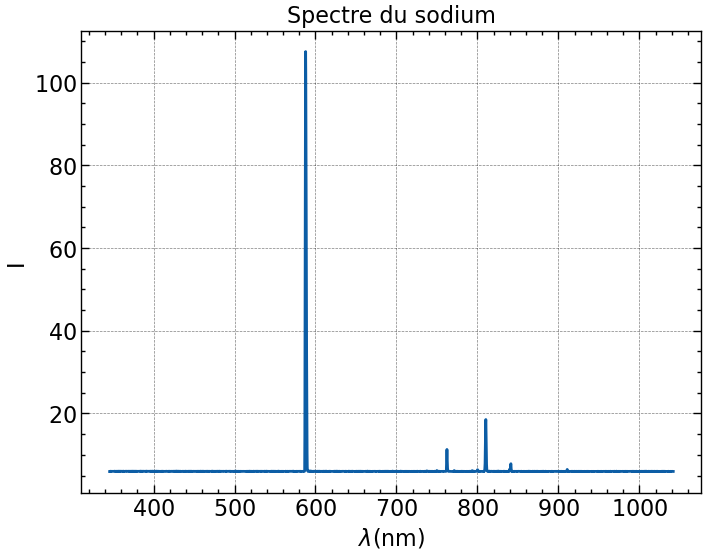

In [3]:
plt.plot(souf['x'],souf['y'])
plt.title('Spectre du sodium')
plt.xlabel('$\lambda$(nm)')
plt.ylabel('I')

### Fit doublet

Faire un fit gaussien :
- Trouver $\lambda_{peak}$
- Trouver LMH = $\Delta\lambda$
- $R$ = $\frac{\lambda_{peak}}{\Delta\lambda}$

In [4]:
#Positon du pic
x_doublet = souf[(souf['x'] > 580) & (souf['x'] < 595)]['x']
y_doublet = souf[(souf['x'] > 580) & (souf['x'] < 595)]['y']
y_doublet = y_doublet - min(y_doublet) #Ajuster pour que le fit fonctionne mieux en enlevant bruit de fond

Text(0.5, 1.0, 'Doublet du sodium')

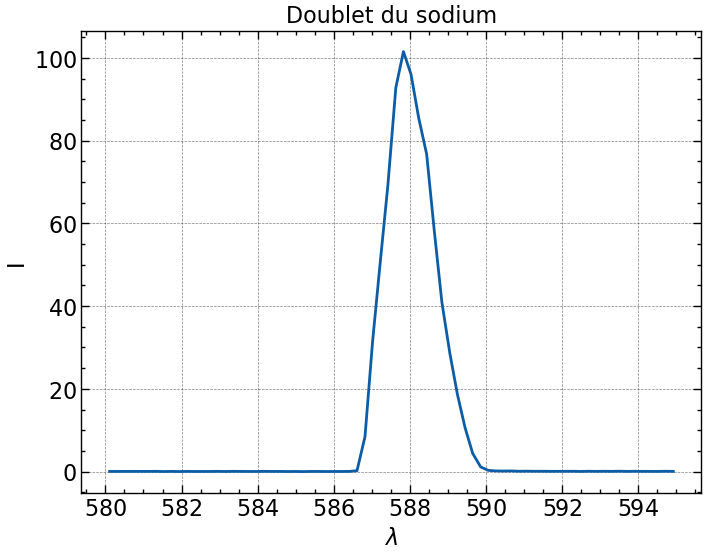

In [5]:
plt.plot(x_doublet,y_doublet)
plt.xlabel('$\lambda$')
plt.ylabel('I')
plt.title('Doublet du sodium')

In [6]:
#Fonction gaussienne
def func(x, a, x0, sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x = x_doublet
y = y_doublet
popt, pcov = curve_fit(func, x, y,p0 = [100,588,1]) #fit

#Modèle avec paramètres du fit
xfit = np.linspace(min(x)-1,max(x)+1,100000) 
yfit = func(xfit,popt[0], popt[1], popt[2]) 

#Trouver Largeur à mi-hauteur
peak = []
df_fit=pd.DataFrame(list(zip(xfit,yfit)),columns=['x','y'])
maximum = max(df_fit['y'])
half = maximum/2
peak.append(popt[1])
                           
x_half = []            
y_half = []

for j in range(len(df_fit['y'])): #Trouver I pour les deux x des LMH
    if df_fit['y'][j] != 0:      
         if (abs(df_fit['y'][j] - half)/df_fit['y'][j])<0.001: # On trouve x et y pour les valeurs de I +/- 0.1% de Imax/2
            y_half.append(df_fit['y'][j])
            x_half.append(df_fit['x'][j])
    
#Trouver les valeurs de x1 et x2
x1_liste = np.array(x_half)[np.array(x_half)<587.3] #Liste des position x1 pour les I trouvée dans l'étape précédente
x2_liste = np.array(x_half)[np.array(x_half)>587.3] #Liste des position x2 pour les I trouvée dans l'étape précédente

x1 = np.average(x1_liste) #Lambda1
x2 = np.average(x2_liste) #Lambda 2

#Largeur à mi-hauteur
LMH = x2-x1
print('LMH = {:2}'.format(LMH))

#Résolution
R = popt[1]/LMH
print('R = {:2}'.format(R))

LMH = 1.4845899959001372
R = 396.0579787242259


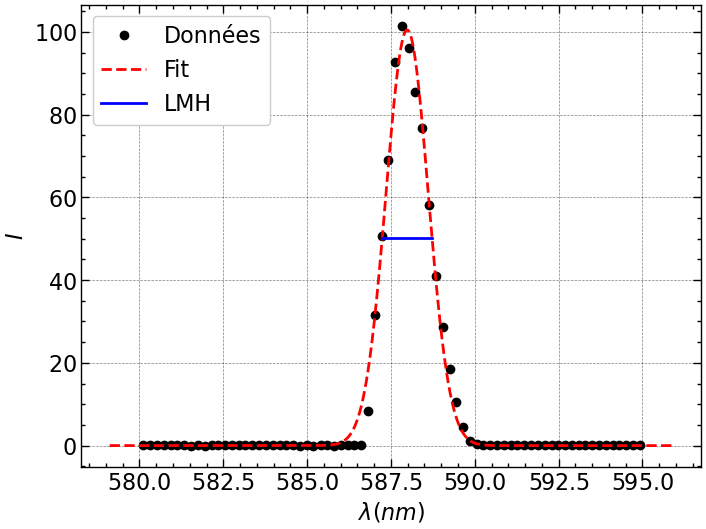

In [7]:
plt.plot(x_doublet,y_doublet,'o',color='black',label='Données')
plt.plot(xfit,yfit, '--r',label='Fit')
plt.plot((x1, x2), (half, half),color='blue',label='LMH')
plt.xlabel('$\lambda(nm)$')
plt.ylabel('$I$')
plt.legend(loc='upper left')
plt.savefig('Résolution')